In [1]:
import numpy as np
from time import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import random, string
np.random.seed(18)
random.seed(18)

Matplotlib is building the font cache; this may take a moment.


# Merge Sort

In [79]:
def merge(left, right, compare):
    result = []
    i, j = 0, 0
    while i < len(left) and j < len(right):
        if compare(left[i], right[j]):
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    while i < len(left):
        result.append(left[i])
        i += 1
    while j < len(right):
        result.append(right[j])
        j += 1
    return result

import operator

def merge_sort(L, compare=operator.lt):
    if len(L) < 2:
        return L[:]
    else:
        middle = int(len(L) / 2)
        left = merge_sort(L[:middle], compare)
        right = merge_sort(L[middle:], compare)
        return merge(left, right, compare)

array = [78, 41, 4, 27, 3, 27, 8, 39, 19, 34, 6, 41, 13, 52, 16]
merge_sort(array)

[3, 4, 6, 8, 13, 16, 19, 27, 27, 34, 39, 41, 41, 52, 78]

In [80]:
def nlogn(n, a):
    return a*n*np.log(n)

In [81]:
n=5
avg_merge=np.zeros((n, 1998))
for t in range(n):
    merge_time=[]
    for i in tqdm(range(2, 2000)):
        ar = np.random.randint(0, 1000, i)
        start = time()
        merge_sort(ar)
        merge_time.append(time() - start)
    avg_merge[t]=merge_time

100%|██████████| 1998/1998 [00:12<00:00, 156.93it/s]


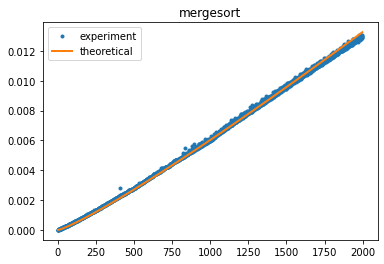

In [82]:
xdata = np.linspace(1, len(np.mean(avg_merge, axis=0)), len(np.mean(avg_merge, axis=0))-1)
ydata = np.array(np.mean(avg_merge, axis=0))
coef = curve_fit(nlogn, xdata, ydata[1:])[0][0]

plt.plot(np.mean(avg_merge, axis=0), '.',linewidth=3, label='experiment')
plt.plot(xdata, nlogn(xdata, coef), linewidth=2, label='theoretical')
plt.legend()
plt.title('mergesort')

# Knuth-Morris-Pratt

In [2]:
def prefix(s):
    v = [0]*len(s)
    for i in range(1,len(s)):
        k = v[i-1]
        while k > 0 and s[k] != s[i]:
            k = v[k-1]
        if s[k] == s[i]:
            k = k + 1
        v[i] = k
    return v

def kmp(s,t):
    index = -1
    f = prefix(s)
    k = 0
    for i in range(len(t)):
        while k > 0 and s[k] != t[i]:
            k = f[k-1]
        if s[k] == t[i]:
            k = k + 1
        if k == len(s):
            index = i - len(s) + 1
            break
    return index


t = 'стогистогстогигстогстогиглстогстогигластогигластог'
p = 'стоп'
print(kmp(p, t))

-1


In [3]:
def n_theor(n, a):
    return a*n

In [4]:
def randomword(length):
   letters = string.ascii_lowercase
   return ''.join(random.choice(letters) for i in range(length))

In [10]:
n=1
avg_kmp = np.zeros((n, 9999))
for j in range(n):
    kmp_time=[]
    for i in tqdm(range(1, 10000)):
        t = randomword(10*i)
        p = randomword(i)
        start = time()
        kmp(p, t)
        kmp_time.append(time() - start)
    avg_kmp[j] = kmp_time

100%|██████████| 9999/9999 [15:13<00:00, 10.94it/s]


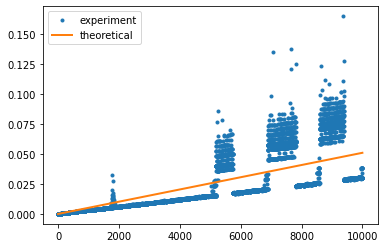

In [11]:
xdata = np.arange(10000-2)
ydata = np.array(np.mean(avg_kmp, axis=0))
coef = curve_fit(n_theor, xdata, ydata[1:])[0][0]

plt.plot(np.mean(avg_kmp, axis=0),'.',linewidth=3, label='experiment')
plt.plot(xdata, n_theor(xdata, coef), linewidth=2, label='theoretical')
plt.legend()

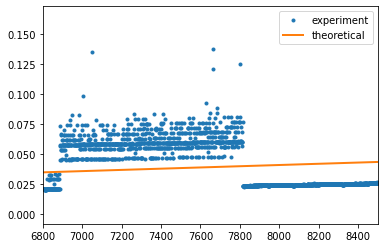

In [16]:
xdata = np.arange(10000-2)
ydata = np.array(np.mean(avg_kmp, axis=0))
coef = curve_fit(n_theor, xdata, ydata[1:])[0][0]

plt.plot(np.mean(avg_kmp, axis=0),'.',linewidth=3, label='experiment')
plt.plot(xdata, n_theor(xdata, coef), linewidth=2, label='theoretical')
plt.legend()
plt.xlim(6800,8500)

In [30]:
n=1
avg_kmp = np.zeros((n, 9999))
for j in range(n):
    kmp_time=[]
    for i in tqdm(range(1, 10000)):
        t = randomword(100*i)
        p = randomword(i)
        start = time()
        kmp(p, t)
        kmp_time.append(time() - start)
    avg_kmp[j] = kmp_time

100%|██████████| 9999/9999 [2:12:30<00:00,  1.26it/s]


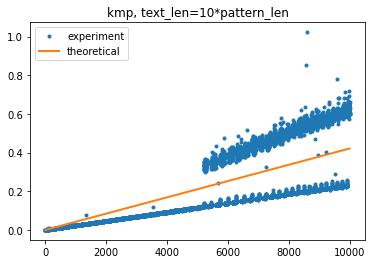

In [31]:
xdata = np.arange(10000-2)
ydata = np.array(np.mean(avg_kmp, axis=0))
coef = curve_fit(n_theor, xdata, ydata[1:])[0][0]

plt.plot(np.mean(avg_kmp, axis=0),'.',linewidth=3, label='experiment')
plt.plot(xdata, n_theor(xdata, coef), linewidth=2, label='theoretical')
plt.legend()
plt.title('kmp, text_len=10*pattern_len')